# Importando datasets de radares

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
ufs = ['RS', 'SC', 'PR']

In [3]:
df_antt = pd.read_csv("../dados/loc_radar/antt.csv", encoding="latin1", sep=";")
df_antt.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado
0,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"483,850",Betim,Principal,Crescente,Ativo,NaN,"-19,959486","-44,085386",80,60
1,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"493,290",Betim,Principal,Crescente,Ativo,NaN,"-19,964349","-44,171924",80,60
2,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"525,350",Brumadinho,Principal,Crescente,Ativo,NaN,"-20,146664","-44,323897",80,60
3,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"528,350",Brumadinho,Principal,Decrescente,Ativo,NaN,"-20,167194","-44,334434",80,60
4,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"568,890",Itaguara,Principal,Decrescente,Ativo,NaN,"-20,410679","-44,526628",80,60


In [4]:
df_antt = df_antt.dropna(subset=['latitude', 'longitude'])
df_antt['latitude'] = df_antt['latitude'].str.replace(',', '.')
df_antt['longitude'] = df_antt['longitude'].str.replace(',', '.')

df_antt['latitude'] = pd.to_numeric(df_antt['latitude'], errors='coerce')
df_antt['longitude'] = pd.to_numeric(df_antt['longitude'], errors='coerce')
df_antt = df_antt[df_antt['uf'].isin(ufs)]

df_antt = df_antt.dropna(subset=['latitude'])
df_antt = df_antt.dropna(subset=['longitude'])

df_antt.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado
32,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,"664,773",Guaratuba,Principal,Crescente,Ativo,NaN,-25.8582,-48.9512,60,60
33,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,"667,013",Guaratuba,Principal,Crescente,Ativo,NaN,-25.8637,-48.9348,60,60
34,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,"668,334",Guaratuba,Principal,Crescente,Ativo,NaN,-25.8693,-48.9341,60,60
35,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,"668,880",Guaratuba,Principal,Decrescente,Ativo,NaN,-25.8749,-48.9363,60,60
36,AUTOPISTA LITORAL SUL,2009,Redutor,BR-101,SC,"48,770",Joinville,Principal,Crescente,Ativo,NaN,-26.3802,-48.8516,80,80


In [5]:
df_dnit = pd.read_excel("../dados/loc_radar/dnit.xlsx")
df_dnit.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série
0,ROB20040003,Redutor Eletrônico de Velocidade,RO,PIMENTA BUENO,364,"200,150","-61.192778, -11.6525",14781707,FLICD2005A00535
1,ROB20040004,Redutor Eletrônico de Velocidade,RO,PIMENTA BUENO,364,"200,525","-61.19394, -11.64794",14781708,FLICD2005A00536
2,ROB20040008,Redutor Eletrônico de Velocidade,RO,JI-PARANA,364,"343,380","-61.949228, -10.87633",14781722,FLICD2005A00528
3,ROB20040009,Redutor Eletrônico de Velocidade,RO,JI-PARANA,364,"343,360","-61.94878, -10.876266",14781721,FLICD2005A00527
4,ROR20040008,Controlador Eletrônico de Velocidade,RO,JI-PARANA,364,"340,220","-61.930647, -10.896874",14781717,FLISD2005A00524


In [6]:
df_dnit[['longitude', 'latitude']] = df_dnit['Coordenadas'].str.replace(' ', '').str.split(',', expand=True)
df_dnit['latitude'] = pd.to_numeric(df_dnit['latitude'], errors='coerce')
df_dnit['longitude'] = pd.to_numeric(df_dnit['longitude'], errors='coerce')
df_dnit = df_dnit[df_dnit['UF'].isin(ufs)]

df_dnit = df_dnit.dropna(subset=['latitude'])
df_dnit = df_dnit.dropna(subset=['longitude'])

df_dnit.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude,latitude
237,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,"127,960","-49.487068, -27.803703",14794301,6042,-49.487068,-27.803703
238,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,"128,275","-49.49019, -27.803961",14794302,6043,-49.490190,-27.803961
239,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282,"215,255","-50.282411, -27.79415",14794315,6046,-50.282411,-27.794150
240,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282,"218,510","-50.3145, -27.796972",14794310,6052,-50.314500,-27.796972
241,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282,"218,550","-50.3147, -27.797219",14794313,6053,-50.314700,-27.797219


In [7]:
df_antt.shape

(207, 15)

In [8]:
df_dnit.shape

(467, 11)

In [9]:
df_2025_ocorrencia = pd.read_csv("../dados/acidentes/por ocorrencia/datatran_agrupado.csv",sep=",")

df_2025_ocorrencia = df_2025_ocorrencia[df_2025_ocorrencia['uf'].isin(ufs)]

df_2025_ocorrencia['latitude'] = df_2025_ocorrencia['latitude'].str.replace(',', '.')
df_2025_ocorrencia['longitude'] = df_2025_ocorrencia['longitude'].str.replace(',', '.')

df_2025_ocorrencia['latitude'] = pd.to_numeric(df_2025_ocorrencia['latitude'], errors='coerce')
df_2025_ocorrencia['longitude'] = pd.to_numeric(df_2025_ocorrencia['longitude'], errors='coerce')

df_2025_ocorrencia = df_2025_ocorrencia.dropna(subset=['latitude'])
df_2025_ocorrencia = df_2025_ocorrencia.dropna(subset=['longitude'])

df_2025_ocorrencia.head()

C:\Users\adria\AppData\Local\Temp\ipykernel_1444\4142165073.py:1: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025_ocorrencia = pd.read_csv("../dados/acidentes/por ocorrencia/datatran_agrupado.csv",sep=",")


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,...,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,...,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,"8,4",CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,...,0,1,2,2,-25.081233,-48.624491,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,...,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv


In [10]:
df_2025_ocorrencia.shape

(59703, 31)

# Juntando os datasets de radares

In [11]:
df_radares = pd.concat([df_dnit, df_antt], ignore_index=True)
df_radares.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude,...,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"127,960","-49.487068, -27.803703",14794301,6042,-49.487068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"128,275","-49.49019, -27.803961",14794302,6043,-49.490190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"215,255","-50.282411, -27.79415",14794315,6046,-50.282411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,510","-50.3145, -27.796972",14794310,6052,-50.314500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,550","-50.3147, -27.797219",14794313,6053,-50.314700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_radares.shape

(674, 24)

# Dataframe de radares e acidentes para GeoDataFrame 

In [13]:
df_radares['geometry'] = df_radares.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
df_radares = gpd.GeoDataFrame(df_radares, geometry='geometry', crs='EPSG:4326')  # ou o mesmo crs dos acidentes
df_radares.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude,...,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,geometry
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"127,960","-49.487068, -27.803703",14794301,6042,-49.487068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.48707 -27.8037)
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"128,275","-49.49019, -27.803961",14794302,6043,-49.490190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.49019 -27.80396)
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"215,255","-50.282411, -27.79415",14794315,6046,-50.282411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-50.28241 -27.79415)
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,510","-50.3145, -27.796972",14794310,6052,-50.314500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-50.3145 -27.79697)
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,550","-50.3147, -27.797219",14794313,6053,-50.314700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-50.3147 -27.79722)


In [14]:
df_2025_ocorrencia['geometry'] = df_2025_ocorrencia.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
df_2025_ocorrencia = gpd.GeoDataFrame(df_2025_ocorrencia, geometry='geometry', crs='EPSG:4326')  # ou o mesmo crs dos acidentes
df_2025_ocorrencia.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo,geometry
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (-48.84676 -25.1144)
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,...,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (-53.51855 -26.65044)
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,...,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (-48.60115 -27.02982)
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,"8,4",CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,...,1,2,2,-25.081233,-48.624491,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (-48.62449 -25.08123)
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,...,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (-50.16633 -27.28937)


In [15]:
df_2025_ocorrencia.shape

(59703, 32)

In [16]:
lista_causas = df_2025_ocorrencia['causa_acidente'].unique().tolist()
print(lista_causas)

['Ingestão de álcool pelo condutor', 'Ausência de reação do condutor', 'Condutor deixou de manter distância do veículo da frente', 'Condutor Dormindo', 'Velocidade Incompatível', 'Acessar a via sem observar a presença dos outros veículos', 'Manobra de mudança de faixa', 'Desrespeitar a preferência no cruzamento', 'Mal súbito do condutor', 'Demais falhas mecânicas ou elétricas', 'Ultrapassagem Indevida', 'Carga excessiva e/ou mal acondicionada', 'Reação tardia ou ineficiente do condutor', 'Transitar na contramão', 'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre', 'Conversão proibida', 'Pista Escorregadia', 'Acumulo de água sobre o pavimento', 'Estacionar ou parar em local proibido', 'Entrada inopinada do pedestre', 'Avarias e/ou desgaste excessivo no pneu', 'Problema com o freio', 'Transitar no acostamento', 'Animais na Pista', 'Objeto estático sobre o leito carroçável', 'Trafegar com motocicleta (ou similar) entre as faixas', 'Chuva', 'Condutor usando celular', 'Restriçã

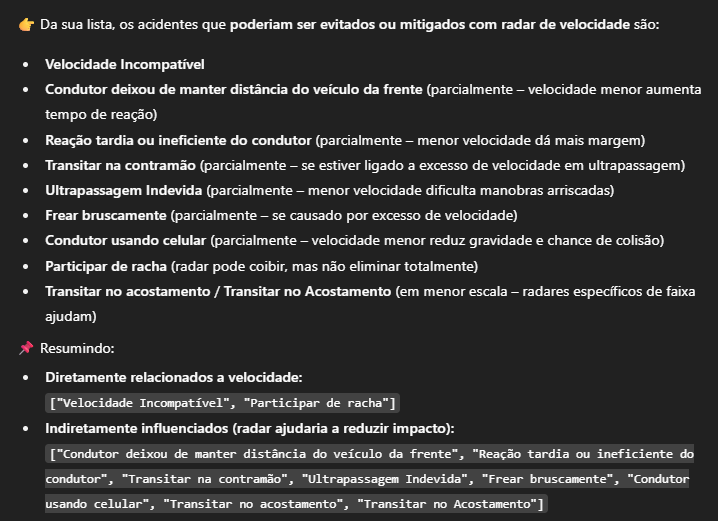

# Somente acidentes com relações de excesso de velocidade

In [17]:
# Lista de causas que poderiam ser evitadas com radar
causas_relacionadas_velocidade = [
    "Velocidade Incompatível",
    "Participar de racha",
    "Condutor deixou de manter distância do veículo da frente",
    "Reação tardia ou ineficiente do condutor",
    "Transitar na contramão",
    "Ultrapassagem Indevida",
    "Frear bruscamente",
    "Condutor usando celular",
    "Transitar no acostamento",
    "Transitar no Acostamento"
]

# Filtrar dataframe
df_2025_ocorrencia = df_2025_ocorrencia[
    df_2025_ocorrencia['causa_acidente'].isin(causas_relacionadas_velocidade)
]

# Visualizar
print(f"Total de acidentes relacionados à velocidade: {len(df_2025_ocorrencia)}")


Total de acidentes relacionados à velocidade: 21150


In [18]:
df_2025_ocorrencia.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo,geometry
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,...,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (-48.60115 -27.02982)
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,...,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (-50.16633 -27.28937)
28,405442.0,2022-01-02,domingo,12:00:00,SC,116,54,PAPANDUVA,Velocidade Incompatível,Tombamento,...,1,2,2,-26.394484,-50.164800,SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,POINT (-50.1648 -26.39448)
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,"504,7",GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,...,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (-51.35702 -26.51557)
39,405599.0,2022-01-03,segunda-feira,07:20:00,SC,101,120,ITAJAI,Condutor deixou de manter distância do veículo...,Colisão traseira,...,1,1,3,-26.912758,-48.711998,SPRF-SC,DEL04-SC,UOP04-DEL04-SC,datatran2022.csv,POINT (-48.712 -26.91276)


In [19]:
# epsg 4326 unidades são graus
# epsg 31982 unidades são metros
radares = df_radares.to_crs(epsg=31982)
acidentes = df_2025_ocorrencia.to_crs(epsg=31982)


In [20]:
radares_buffer = radares.copy()
radares_buffer['geometry'] = radares_buffer.geometry.buffer(5000)  # 2000 metros ao redor de cada radar

# Agora faz o join dos acidentes que estão dentro do buffer
acidentes_proximos = gpd.sjoin(acidentes, radares_buffer, how='left', predicate='within')
radares_buffer.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude,...,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,geometry
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"127,960","-49.487068, -27.803703",14794301,6042,-49.487068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((654033.837 6923624.199, 654009.76 69..."
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,"128,275","-49.49019, -27.803961",14794302,6043,-49.490190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((653725.907 6923599.4, 653701.831 692..."
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"215,255","-50.282411, -27.79415",14794315,6046,-50.282411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((575689.835 6925393.925, 575665.759 6..."
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,510","-50.3145, -27.796972",14794310,6052,-50.314500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((572526.909 6925099.364, 572502.833 6..."
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,"218,550","-50.3147, -27.797219",14794313,6053,-50.314700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((572507.055 6925072.112, 572482.978 6..."


In [21]:
pd.set_option('display.max_columns', None)
acidentes_proximos.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.599675,-27.042947,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"140,480",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.600036,-27.051844,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"141,460",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (582501.853 6981238.174),66.0,SCB23030143,Redutor Eletrônico de Velocidade,SC,PONTE ALTA,470.0,"199,600","-50.133896, -27.308012",14071218,6069,-50.133896,-27.308012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,405442.0,2022-01-02,domingo,12:00:00,SC,116,54,PAPANDUVA,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Rotatória,Sim,4,0,2,0,1,1,2,2,-26.394484,-50.164800,SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,POINT (583305.523 7080358.408),526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-50.156470,-26.393600,AUTOPISTA PLANALTO SUL,2017.0,Redutor,BR-116,SC,"53,300",Papanduva,Principal,Crescente,Ativo,NaN,60.0,60.0
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,"504,7",GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
acidentes_proximos['tem_radar_proximo'] = acidentes_proximos['index_right'].notnull()

In [23]:
acidentes_proximos.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.599675,-27.042947,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"140,480",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0,True
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.600036,-27.051844,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"141,460",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0,True
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (582501.853 6981238.174),66.0,SCB23030143,Redutor Eletrônico de Velocidade,SC,PONTE ALTA,470.0,"199,600","-50.133896, -27.308012",14071218,6069,-50.133896,-27.308012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
28,405442.0,2022-01-02,domingo,12:00:00,SC,116,54,PAPANDUVA,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Rotatória,Sim,4,0,2,0,1,1,2,2,-26.394484,-50.164800,SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,POINT (583305.523 7080358.408),526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-50.156470,-26.393600,AUTOPISTA PLANALTO SUL,2017.0,Redutor,BR-116,SC,"53,300",Papanduva,Principal,Crescente,Ativo,NaN,60.0,60.0,True
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,"504,7",GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [24]:
# Quantidade total de acidentes
total = len(acidentes_proximos)
print(total)

58861


In [25]:
# Quantidade de acidentes que NÃO têm radar próximo
sem_radar = (~acidentes_proximos['tem_radar_proximo']).sum()

# Porcentagem de acidentes sem radar próximo
percentual_sem_radar = (sem_radar / total) * 100

print(f"{percentual_sem_radar:.2f}% dos acidentes ocorreram longe de radares")

16.52% dos acidentes ocorreram longe de radares


# Porcentagem de acidentes onde não tem um radar a cada valor de buffer (Por exemplo, não tem um radar em 1000m do acidente)

In [26]:
valores_buffer = [500, 1000, 2000, 3000, 5000, 10000]

# Lista para armazenar os resultados
resultados = []

for buffer in valores_buffer:
    # Cria o buffer ao redor de cada radar
    radares_buffer = radares.copy()
    radares_buffer['geometry'] = radares_buffer.geometry.buffer(buffer)

    # Faz o spatial join para encontrar acidentes dentro do buffer
    acidentes_join = gpd.sjoin(acidentes, radares_buffer, how='left', predicate='within')

    # Cria uma coluna indicando se tem radar próximo (True se encontrou, False se não encontrou)
    acidentes_join['tem_radar_proximo'] = acidentes_join['index_right'].notnull()

    # Quantidade total de acidentes
    total = len(acidentes_join)

    # Quantidade de acidentes que NÃO têm radar próximo
    sem_radar = (~acidentes_join['tem_radar_proximo']).sum()

    # Porcentagem de acidentes sem radar próximo
    percentual = (sem_radar / total) * 100

    # Adiciona o resultado na lista
    resultados.append({'Buffer (m)': buffer, '% Acidentes sem radar': round(percentual, 2)})

# Converte para DataFrame e exibe como tabela
df_resultados = pd.DataFrame(resultados)
df_resultados.head(30)

,Buffer (m),% Acidentes sem radar
0,500,80.62
1,1000,64.96
2,2000,43.00
3,3000,29.52
4,5000,16.52
5,10000,6.16


# Considerando apenas os acidentes com mortos

In [27]:
acidentes_mortais = acidentes_proximos[acidentes_proximos['mortos'] >= 1]
acidentes_mortais.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
103,405924.0,2022-01-04,terça-feira,08:20:00,PR,277,402,CANDOI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Simples,Curva,Não,6,1,0,1,0,5,1,5,-25.455064,-51.945903,SPRF-PR,DEL08-PR,UOP01-DEL08-PR,datatran2022.csv,POINT (404901.013 7184324.742),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
139,406123.0,2022-01-05,quarta-feira,16:00:00,RS,470,42,SAO JOSE DO OURO,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Reta,Não,6,2,1,0,2,5,1,9,-27.830547,-51.440107,SPRF-RS,DEL08-RS,UOP05-DEL08-RS,datatran2022.csv,POINT (456659.802 6921490.88),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
267,407504.0,2022-01-08,sábado,09:10:00,RS,386,"234,7",SOLEDADE,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,19,2,3,0,13,1,3,4,-28.722898,-52.560581,SPRF-RS,DEL04-RS,UOP03-DEL04-RS,datatran2022.csv,POINT (347585.682 6821716.605),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
443,408416.0,2022-01-13,quinta-feira,15:50:00,SC,282,179,BOCAINA DO SUL,Ultrapassagem Indevida,Colisão lateral mesmo sentido,Com Vítimas Fatais,Pleno dia,Decrescente,Sol,Simples,Curva,Não,5,1,1,1,1,1,2,3,-27.739967,-49.932175,SPRF-SC,DEL05-SC,UOP01-DEL05-SC,datatran2022.csv,POINT (605245.71 6931145.8),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
449,408469.0,2022-01-13,quinta-feira,21:15:00,RS,158,"309,9",ITAARA,Transitar na contramão,Colisão frontal,Com Vítimas Fatais,Plena Noite,Crescente,Céu Claro,Simples,Aclive;Reta,Sim,4,1,0,0,2,1,0,3,-29.603897,-53.766353,SPRF-RS,DEL09-RS,UOP01-DEL09-RS,datatran2022.csv,POINT (232084.809 6721908.115),269.0,RSB24110512,Redutor Eletrônico de Velocidade,RS,ITAARA,158.0,"307,560","-53.76609, -29.58927",23605,L0842,-53.76609,-29.58927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [28]:
# Quantidade total de acidentes
total = len(acidentes_mortais)
print(total)

2765


In [29]:

# Quantidade de acidentes que NÃO têm radar próximo
sem_radar = (~acidentes_mortais['tem_radar_proximo']).sum()

# Porcentagem de acidentes sem radar próximo
percentual_sem_radar = (sem_radar / total) * 100

print(f"{percentual_sem_radar:.2f}% dos acidentes com morte ocorreram longe de radares")

31.72% dos acidentes com morte ocorreram longe de radares


# Porcentagem de acidentes com MORTES onde não tem um radar a cada valor de buffer (Por exemplo, não tem um radar em 1000m do acidente)

In [30]:
# Lista com os valores de buffer (em metros)
valores_buffer = [500, 1000, 2000, 3000, 5000, 10000]

# Lista para armazenar os resultados
resultados = []

for buffer in valores_buffer:
    # Cria o buffer ao redor de cada radar
    radares_buffer = radares.copy()
    radares_buffer['geometry'] = radares_buffer.geometry.buffer(buffer)

    # Faz o spatial join para encontrar acidentes dentro do buffer
    acidentes_join = gpd.sjoin(acidentes, radares_buffer, how='left', predicate='within')

    # Marca se o acidente tem radar próximo
    acidentes_join['tem_radar_proximo'] = acidentes_join['index_right'].notnull()

    # Filtra apenas os acidentes com pelo menos 1 morte
    acidentes_mortais = acidentes_join[acidentes_join['mortos'] >= 1]

    # Total de acidentes com morte
    total = len(acidentes_mortais)

    if total > 0:
        # Acidentes com morte e sem radar próximo
        sem_radar = (~acidentes_mortais['tem_radar_proximo']).sum()
        percentual = (sem_radar / total) * 100
    else:
        percentual = None  # ou 0, dependendo de como quiser tratar

    # Armazena o resultado
    resultados.append({'Buffer (m)': buffer, '% Acidentes c/ morte sem radar': round(percentual, 2) if percentual is not None else 'Sem dados'})

# Converte para DataFrame e exibe
df_resultados = pd.DataFrame(resultados)
df_resultados.head(20)

,Buffer (m),% Acidentes c/ morte sem radar
0,500,89.01
1,1000,78.68
2,2000,60.06
3,3000,47.12
4,5000,31.72
5,10000,13.86


# Considerando 10000m e acidentes com mortes

In [31]:
acidentes_mortais.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
103,405924.0,2022-01-04,terça-feira,08:20:00,PR,277,402,CANDOI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Simples,Curva,Não,6,1,0,1,0,5,1,5,-25.455064,-51.945903,SPRF-PR,DEL08-PR,UOP01-DEL08-PR,datatran2022.csv,POINT (404901.013 7184324.742),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
139,406123.0,2022-01-05,quarta-feira,16:00:00,RS,470,42,SAO JOSE DO OURO,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Reta,Não,6,2,1,0,2,5,1,9,-27.830547,-51.440107,SPRF-RS,DEL08-RS,UOP05-DEL08-RS,datatran2022.csv,POINT (456659.802 6921490.88),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
267,407504.0,2022-01-08,sábado,09:10:00,RS,386,"234,7",SOLEDADE,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,19,2,3,0,13,1,3,4,-28.722898,-52.560581,SPRF-RS,DEL04-RS,UOP03-DEL04-RS,datatran2022.csv,POINT (347585.682 6821716.605),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
443,408416.0,2022-01-13,quinta-feira,15:50:00,SC,282,179,BOCAINA DO SUL,Ultrapassagem Indevida,Colisão lateral mesmo sentido,Com Vítimas Fatais,Pleno dia,Decrescente,Sol,Simples,Curva,Não,5,1,1,1,1,1,2,3,-27.739967,-49.932175,SPRF-SC,DEL05-SC,UOP01-DEL05-SC,datatran2022.csv,POINT (605245.71 6931145.8),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
449,408469.0,2022-01-13,quinta-feira,21:15:00,RS,158,"309,9",ITAARA,Transitar na contramão,Colisão frontal,Com Vítimas Fatais,Plena Noite,Crescente,Céu Claro,Simples,Aclive;Reta,Sim,4,1,0,0,2,1,0,3,-29.603897,-53.766353,SPRF-RS,DEL09-RS,UOP01-DEL09-RS,datatran2022.csv,POINT (232084.809 6721908.115),269.0,RSB24110512,Redutor Eletrônico de Velocidade,RS,ITAARA,158.0,"307,560","-53.76609, -29.58927",23605,L0842,-53.76609,-29.58927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [32]:
acidentes_mortais_sem_radar = acidentes_mortais[acidentes_mortais['tem_radar_proximo'] == False]
acidentes_mortais_sem_radar.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
103,405924.0,2022-01-04,terça-feira,08:20:00,PR,277,402,CANDOI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Simples,Curva,Não,6,1,0,1,0,5,1,5,-25.455064,-51.945903,SPRF-PR,DEL08-PR,UOP01-DEL08-PR,datatran2022.csv,POINT (404901.013 7184324.742),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
139,406123.0,2022-01-05,quarta-feira,16:00:00,RS,470,42,SAO JOSE DO OURO,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Reta,Não,6,2,1,0,2,5,1,9,-27.830547,-51.440107,SPRF-RS,DEL08-RS,UOP05-DEL08-RS,datatran2022.csv,POINT (456659.802 6921490.88),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
267,407504.0,2022-01-08,sábado,09:10:00,RS,386,"234,7",SOLEDADE,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,19,2,3,0,13,1,3,4,-28.722898,-52.560581,SPRF-RS,DEL04-RS,UOP03-DEL04-RS,datatran2022.csv,POINT (347585.682 6821716.605),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
443,408416.0,2022-01-13,quinta-feira,15:50:00,SC,282,179,BOCAINA DO SUL,Ultrapassagem Indevida,Colisão lateral mesmo sentido,Com Vítimas Fatais,Pleno dia,Decrescente,Sol,Simples,Curva,Não,5,1,1,1,1,1,2,3,-27.739967,-49.932175,SPRF-SC,DEL05-SC,UOP01-DEL05-SC,datatran2022.csv,POINT (605245.71 6931145.8),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
604,409494.0,2022-01-17,segunda-feira,17:45:00,RS,392,193,SANTANA DA BOA VISTA,Velocidade Incompatível,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Chuva,Simples,Curva,Não,4,2,0,0,1,3,0,5,-30.918536,-53.105249,SPRF-RS,DEL09-RS,UOP02-DEL09-RS,datatran2022.csv,POINT (298827.957 6577526.714),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [33]:
acidentes_mortais_sem_radar.shape

(612, 58)

In [34]:
acidentes_mortais_sem_radar.dtypes

id                         float64
data_inversa                object
dia_semana                  object
horario                     object
uf_left                     object
br                           int64
km                          object
municipio_left              object
causa_acidente              object
tipo_acidente               object
classificacao_acidente      object
fase_dia                    object
sentido_via                 object
condicao_metereologica      object
tipo_pista_left             object
tracado_via                 object
uso_solo                    object
pessoas                      int64
mortos                       int64
feridos_leves                int64
feridos_graves               int64
ilesos                       int64
ignorados                    int64
feridos                      int64
veiculos                     int64
latitude_left              float64
longitude_left             float64
regional                    object
delegacia           

In [35]:
acidentes_mortais_sem_radar['km'] = acidentes_mortais_sem_radar['km'].str.replace(',', '.', regex=False).astype(float)
acidentes_mortais_sem_radar.head()

c:\Users\adria\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
103,405924.0,2022-01-04,terça-feira,08:20:00,PR,277,402.0,CANDOI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Simples,Curva,Não,6,1,0,1,0,5,1,5,-25.455064,-51.945903,SPRF-PR,DEL08-PR,UOP01-DEL08-PR,datatran2022.csv,POINT (404901.013 7184324.742),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
139,406123.0,2022-01-05,quarta-feira,16:00:00,RS,470,42.0,SAO JOSE DO OURO,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Reta,Não,6,2,1,0,2,5,1,9,-27.830547,-51.440107,SPRF-RS,DEL08-RS,UOP05-DEL08-RS,datatran2022.csv,POINT (456659.802 6921490.88),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
267,407504.0,2022-01-08,sábado,09:10:00,RS,386,234.7,SOLEDADE,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,19,2,3,0,13,1,3,4,-28.722898,-52.560581,SPRF-RS,DEL04-RS,UOP03-DEL04-RS,datatran2022.csv,POINT (347585.682 6821716.605),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
443,408416.0,2022-01-13,quinta-feira,15:50:00,SC,282,179.0,BOCAINA DO SUL,Ultrapassagem Indevida,Colisão lateral mesmo sentido,Com Vítimas Fatais,Pleno dia,Decrescente,Sol,Simples,Curva,Não,5,1,1,1,1,1,2,3,-27.739967,-49.932175,SPRF-SC,DEL05-SC,UOP01-DEL05-SC,datatran2022.csv,POINT (605245.71 6931145.8),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
604,409494.0,2022-01-17,segunda-feira,17:45:00,RS,392,193.0,SANTANA DA BOA VISTA,Velocidade Incompatível,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Chuva,Simples,Curva,Não,4,2,0,0,1,3,0,5,-30.918536,-53.105249,SPRF-RS,DEL09-RS,UOP02-DEL09-RS,datatran2022.csv,POINT (298827.957 6577526.714),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [36]:
acidentes_mortais_sem_radar['br'].value_counts()

br
277    108
376     68
116     68
470     44
386     33
290     31
153     29
369     29
392     27
280     26
285     25
163     17
158     17
373     15
282     15
472     14
101     10
476      8
293      8
287      7
468      6
471      3
487      2
0        2
Name: count, dtype: int64

In [37]:
br_kms = acidentes_mortais_sem_radar[['br', 'km']].sort_values(['br', 'km'])
br_kms.head(200)

,br,km
140357,0,0.0
144856,0,0.0
212027,101,9.5
141873,101,38.1
109514,101,86.6
...,...,...
149318,277,406.5
144209,277,408.3
13486,277,410.9
79735,277,410.9


In [38]:
df_grouped = acidentes_mortais_sem_radar.groupby(['br', 'km'])['mortos'].sum().reset_index()
df_grouped.head(200)

,br,km,mortos
0,0,0.0,2
1,101,9.5,1
2,101,38.1,2
3,101,86.6,1
4,101,88.2,1
...,...,...,...
195,277,422.4,2
196,277,423.3,2
197,277,426.2,2
198,277,430.0,3


# Considerando 10000m e todos os acidentes

In [39]:
acidentes_proximos.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.599675,-27.042947,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"140,480",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0,True
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.600036,-27.051844,AUTOPISTA LITORAL SUL,2009.0,Redutor,BR-101,SC,"141,460",Balneário Camboriú,Principal,Crescente,Ativo,NaN,60.0,60.0,True
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (582501.853 6981238.174),66.0,SCB23030143,Redutor Eletrônico de Velocidade,SC,PONTE ALTA,470.0,"199,600","-50.133896, -27.308012",14071218,6069,-50.133896,-27.308012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
28,405442.0,2022-01-02,domingo,12:00:00,SC,116,54,PAPANDUVA,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Rotatória,Sim,4,0,2,0,1,1,2,2,-26.394484,-50.164800,SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,POINT (583305.523 7080358.408),526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-50.156470,-26.393600,AUTOPISTA PLANALTO SUL,2017.0,Redutor,BR-116,SC,"53,300",Papanduva,Principal,Crescente,Ativo,NaN,60.0,60.0,True
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,"504,7",GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [40]:
acidentes_sem_radar = acidentes_proximos[acidentes_proximos['tem_radar_proximo'] == False]
acidentes_sem_radar.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,"504,7",GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
59,405742.0,2022-01-03,segunda-feira,15:55:00,SC,101,123,ITAJAI,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Interseção de Vias,Sim,2,0,1,0,1,0,1,2,-26.936686,-48.698769,SPRF-SC,DEL04-SC,UOP04-DEL04-SC,datatran2022.csv,POINT (728481.265 7018498.036),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
63,405761.0,2022-01-03,segunda-feira,17:45:00,RS,116,"613,1",ARROIO GRANDE,Velocidade Incompatível,Colisão lateral mesmo sentido,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,4,0,0,0,3,1,0,3,-32.258190,-53.083957,SPRF-RS,DEL07-RS,UOP03-DEL07-RS,datatran2022.csv,POINT (303693.931 6429039.374),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
66,405770.0,2022-01-03,segunda-feira,17:30:00,PR,369,"398,5",MAMBORE,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Simples,Declive;Curva,Não,6,0,1,2,2,1,3,4,-24.304400,-52.599500,SPRF-PR,DEL04-PR,UOP03-DEL04-PR,datatran2022.csv,POINT (337684.056 7311138.806),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
78,405839.0,2022-01-04,terça-feira,07:15:00,RS,285,"318,5",PASSO FUNDO,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,Sem Vítimas,Pleno dia,Crescente,Garoa/Chuvisco,Simples,Curva,Não,2,0,0,0,2,0,0,1,-28.269916,-52.603226,SPRF-RS,DEL08-RS,UOP03-DEL08-RS,datatran2022.csv,POINT (342749.935 6871854.919),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [41]:
acidentes_sem_radar.shape

(9725, 58)

In [42]:
acidentes_sem_radar['km'] = acidentes_sem_radar['km'].str.replace(',', '.', regex=False).astype(float)
acidentes_sem_radar.head()

c:\Users\adria\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,504.7,GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
59,405742.0,2022-01-03,segunda-feira,15:55:00,SC,101,123.0,ITAJAI,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Interseção de Vias,Sim,2,0,1,0,1,0,1,2,-26.936686,-48.698769,SPRF-SC,DEL04-SC,UOP04-DEL04-SC,datatran2022.csv,POINT (728481.265 7018498.036),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
63,405761.0,2022-01-03,segunda-feira,17:45:00,RS,116,613.1,ARROIO GRANDE,Velocidade Incompatível,Colisão lateral mesmo sentido,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,4,0,0,0,3,1,0,3,-32.258190,-53.083957,SPRF-RS,DEL07-RS,UOP03-DEL07-RS,datatran2022.csv,POINT (303693.931 6429039.374),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
66,405770.0,2022-01-03,segunda-feira,17:30:00,PR,369,398.5,MAMBORE,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Simples,Declive;Curva,Não,6,0,1,2,2,1,3,4,-24.304400,-52.599500,SPRF-PR,DEL04-PR,UOP03-DEL04-PR,datatran2022.csv,POINT (337684.056 7311138.806),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
78,405839.0,2022-01-04,terça-feira,07:15:00,RS,285,318.5,PASSO FUNDO,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,Sem Vítimas,Pleno dia,Crescente,Garoa/Chuvisco,Simples,Curva,Não,2,0,0,0,2,0,0,1,-28.269916,-52.603226,SPRF-RS,DEL08-RS,UOP03-DEL08-RS,datatran2022.csv,POINT (342749.935 6871854.919),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [43]:
acidentes_sem_radar['br'].value_counts()

br
116    1354
277    1319
101    1279
376    1076
470     687
369     506
386     360
290     350
282     335
153     322
285     302
280     298
163     281
392     235
476     232
158     197
373     129
287     100
472      65
293      55
480      45
471      42
468      41
469      37
0        27
272      23
487      16
467      12
Name: count, dtype: int64

In [44]:
df_grouped = acidentes_sem_radar.groupby(['br', 'km'])['mortos'].sum().reset_index()
df_grouped.head(200)

,br,km,mortos
0,0,0.0,2
1,101,1.0,0
2,101,1.3,0
3,101,1.8,0
4,101,2.0,0
...,...,...,...
195,101,72.0,0
196,101,72.9,0
197,101,73.0,0
198,101,73.3,0


In [45]:
# Suponha que df já tem as colunas: 'br', 'km', 'mortos'
# Exemplo de valor ajustável para agrupamento de km:
agrupamento_km = 5  # pode ser 1, 2, 5, 10, etc.

# Cria uma nova coluna de "faixa de km"
df_grouped['km_faixa'] = (df_grouped['km'] // agrupamento_km) * agrupamento_km

# Agrupa por BR e pela faixa de km
df_agrupado = (
    df_grouped.groupby(['br', 'km_faixa'], as_index=False)
      .agg(
          qtd_acidentes=('mortos', 'count'),
          qtd_mortos=('mortos', 'sum')
      )
      .sort_values(['br', 'km_faixa'])
)

df_agrupado.head(200)


,br,km_faixa,qtd_acidentes,qtd_mortos
0,0,0.0,1,2
1,101,0.0,10,0
2,101,5.0,10,1
3,101,10.0,18,0
4,101,15.0,12,0
...,...,...,...,...
195,153,380.0,5,3
196,153,385.0,5,1
197,153,390.0,4,3
198,153,395.0,1,0


In [46]:
df_agrupado = df_agrupado.sort_values('qtd_acidentes', ascending=False)
df_agrupado.head(200)

,br,km_faixa,qtd_acidentes,qtd_mortos
24,101,125.0,32,3
25,101,130.0,32,2
970,376,0.0,32,1
20,101,100.0,29,1
1243,470,55.0,29,2
...,...,...,...,...
1120,386,330.0,8,1
430,277,405.0,8,2
431,277,410.0,8,4
433,277,420.0,8,4


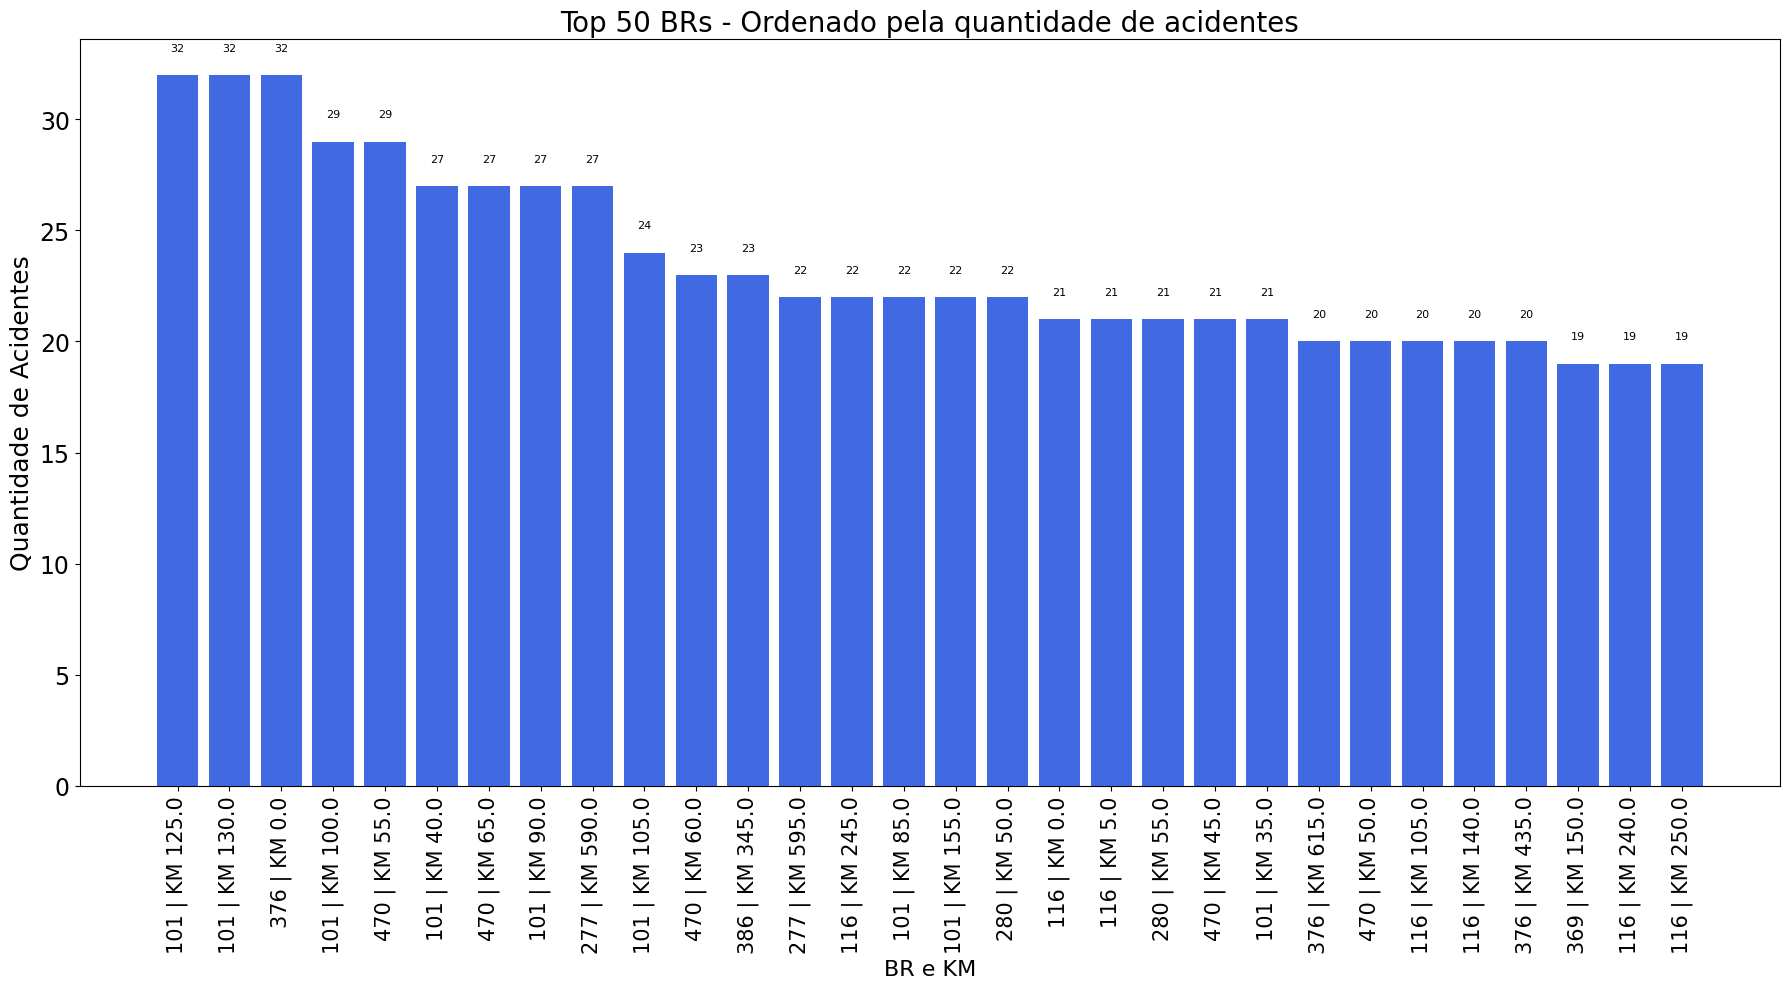

: 

In [ ]:
import matplotlib.pyplot as plt
df_agrupado['br_km'] = df_agrupado['br'].astype(str) + ' | KM ' + df_agrupado['km_faixa'].astype(str)

# Selecionar os 50 primeiros após ordenação
top_30 = df_agrupado.sort_values('qtd_acidentes', ascending=False).head(30)

plt.figure(figsize=(18, 10))
bars = plt.bar(top_30['br_km'], top_30['qtd_acidentes'], color='royalblue')

# Adicionar rótulos com os valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)

# Ajustar rótulos e título com tamanhos maiores
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=17)
plt.xlabel('BR e KM', fontsize=16)
plt.ylabel('Quantidade de Acidentes', fontsize=18)
plt.title('Top 50 BRs - Ordenado pela quantidade de acidentes', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df_agrupado = df_agrupado.sort_values('qtd_mortos', ascending=False)
df_agrupado.head(200)

,br,km_faixa,qtd_acidentes,qtd_mortos,br_km
1284,376,545.0,15,16,376 | KM 545.0
26,101,130.0,46,14,101 | KM 130.0
1499,470,45.0,41,14,470 | KM 45.0
79,116,100.0,27,13,116 | KM 100.0
1149,369,505.0,13,13,369 | KM 505.0
...,...,...,...,...,...
1164,373,250.0,9,3,373 | KM 250.0
1232,376,235.0,13,3,376 | KM 235.0
1136,369,440.0,11,3,369 | KM 440.0
255,153,495.0,8,3,153 | KM 495.0


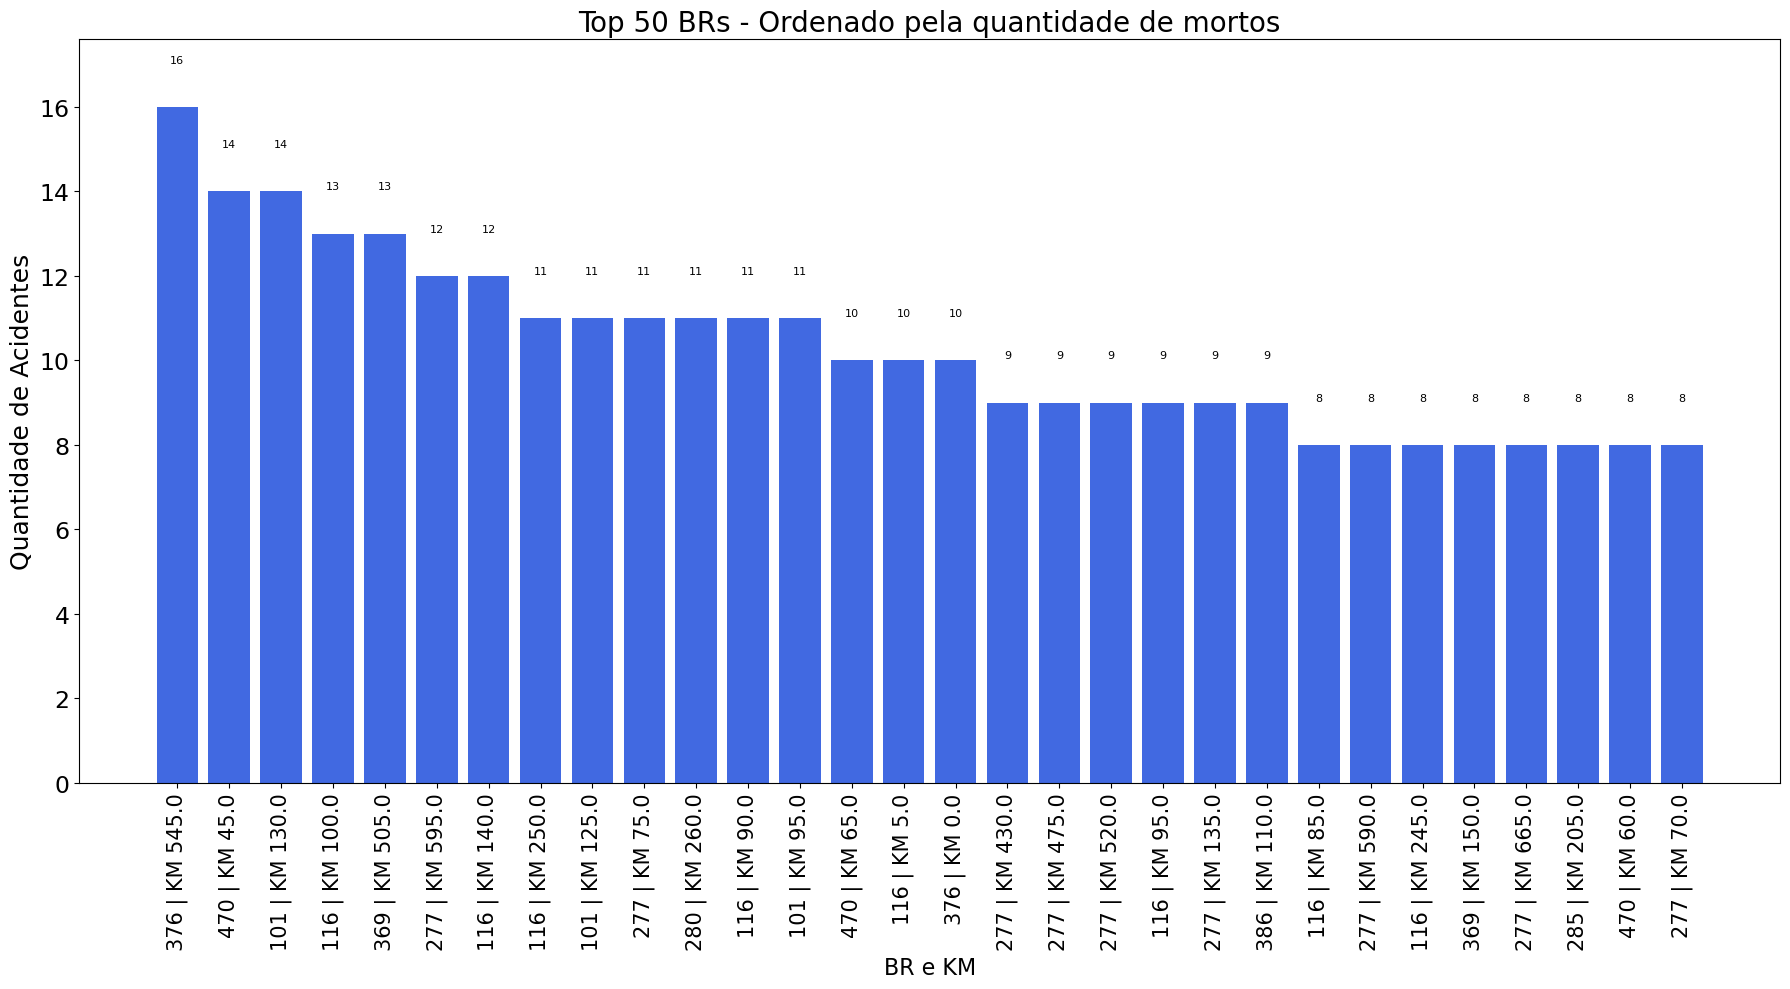

In [ ]:
# Selecionar os 50 primeiros após ordenação
top_30 = df_agrupado.sort_values('qtd_mortos', ascending=False).head(30)

plt.figure(figsize=(18, 10))
bars = plt.bar(top_30['br_km'], top_30['qtd_mortos'], color='royalblue')

# Adicionar rótulos com os valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)
max_valor = top_30['qtd_mortos'].max()
plt.ylim(0, max_valor * 1.1)

# Ajustar rótulos e título com tamanhos maiores
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=17)
plt.xlabel('BR e KM', fontsize=16)
plt.ylabel('Quantidade de Acidentes', fontsize=18)
plt.title('Top 50 BRs - Ordenado pela quantidade de mortos', fontsize=20)
plt.tight_layout()
plt.show()